# Multiple Linear Regression from scratch with gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
w, b = generate_w_b(5, w_limit=5, b_limit=15)
X_train, y_train = generate_X_y((100, 5), w, b, x_limit=10, random_err=30)
X_train.shape, y_train.shape

((100, 5), (100,))

In [3]:
w_init = np.zeros_like(w)
b_init = 0.0

iterations = 1000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

print(f"Actual b: {b:0.2f},\tPredicted b: {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

Iteration    0: Cost   506.03
Iteration  100: Cost   126.69
Iteration  200: Cost   120.18
Iteration  300: Cost   119.14
Iteration  400: Cost   118.97
Iteration  500: Cost   118.95
Iteration  600: Cost   118.94
Iteration  700: Cost   118.94
Iteration  800: Cost   118.94
Iteration  900: Cost   118.94
Actual b: -11.49,	Predicted b: -10.24
Actual w[0]: -3.13,	Predicted w[0]: -3.34
Actual w[1]: -1.36,	Predicted w[1]: -1.08
Actual w[2]: 3.82,	Predicted w[2]: 3.70
Actual w[3]: -0.18,	Predicted w[3]: 0.03
Actual w[4]: -4.81,	Predicted w[4]: -5.13


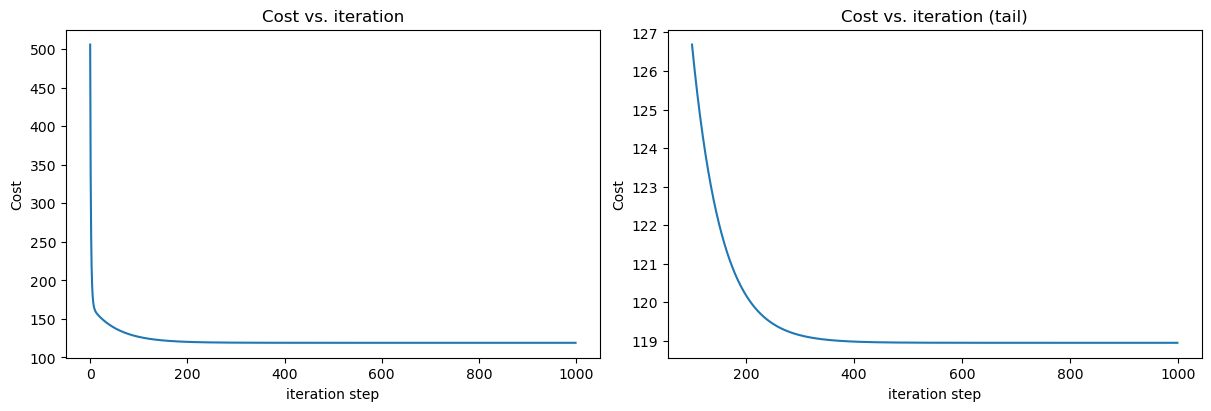

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])

ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [5]:
print(f"Actual b: {b:0.2f},\tPredicted b: {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = np.dot(X_train, w_final) + b_final
mse_ = mse(y_train, y_pred)
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mae(y_train, y_pred)
print(f"Mean absolute error: {mae_:0.2f}")

Actual b: -11.49,	Predicted b: -10.24
Actual w[0]: -3.13,	Predicted w[0]: -3.34
Actual w[1]: -1.36,	Predicted w[1]: -1.08
Actual w[2]: 3.82,	Predicted w[2]: 3.70
Actual w[3]: -0.18,	Predicted w[3]: 0.03
Actual w[4]: -4.81,	Predicted w[4]: -5.13
Mean squared error: 237.89
Mean absolute error: 13.20


# Multiple Linear Regression from scratch with ordinary least squares method

In [6]:
class MultipleLinearRegression:

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.coeffs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        X = np.array(X)
        result = np.zeros(len(X))
        for i in range(X.shape[1]):
            result += X[:, i] * self.coeffs[i]
        return result
    
    def coeffs(self):
        return self.coeffs

In [7]:
linear_model = MultipleLinearRegression()
linear_model.fit(X_train, y_train)
w_final = linear_model.coeffs
b_final = 0.0
for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = linear_model.predict(X_train)
mse_ = mse(y_train, y_pred)
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mae(y_train, y_pred)
print(f"Mean absolute error: {mae_:0.2f}")

Actual w[0]: -3.13,	Predicted w[0]: -3.48
Actual w[1]: -1.36,	Predicted w[1]: -1.09
Actual w[2]: 3.82,	Predicted w[2]: 3.31
Actual w[3]: -0.18,	Predicted w[3]: -0.24
Actual w[4]: -4.81,	Predicted w[4]: -4.99
Mean squared error: 334.04
Mean absolute error: 15.21


# Multiple Linear Regression with Sklearn

In [8]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
w_final = linear_model.coef_
b_final = linear_model.intercept_

print(f"Actual b: {b:0.2f},\tPredicted b: {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = linear_model.predict(X_train)
mse_ = mean_squared_error(y_train, y_pred)
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mean_absolute_error(y_train, y_pred)
print(f"Mean absolute error: {mae_:0.2f}")

Actual b: -11.49,	Predicted b: -10.25
Actual w[0]: -3.13,	Predicted w[0]: -3.34
Actual w[1]: -1.36,	Predicted w[1]: -1.08
Actual w[2]: 3.82,	Predicted w[2]: 3.70
Actual w[3]: -0.18,	Predicted w[3]: 0.03
Actual w[4]: -4.81,	Predicted w[4]: -5.13
Mean squared error: 237.89
Mean absolute error: 13.20


In [10]:
linear_model = SGDRegressor()
linear_model.fit(X_train, y_train)
w_final = linear_model.coef_
b_final = linear_model.intercept_[0]

print(f"Actual b: {b:0.2f},\tPredicted b:_ {b_final:0.2f}")

for i in range(len(w)):
    print(f"Actual w[{i}]: {w[i]:0.2f},\tPredicted w[{i}]: {w_final[i]:0.2f}")

y_pred = linear_model.predict(X_train)
mse_ = mean_squared_error(y_train, y_pred)
print(f"Mean squared error: {mse_:0.2f}")
mae_ = mean_absolute_error(y_train, y_pred)
print(f"Mean absolute error: {mae_:0.2f}")

Actual b: -11.49,	Predicted b:_ -10.36
Actual w[0]: -3.13,	Predicted w[0]: -3.01
Actual w[1]: -1.36,	Predicted w[1]: -0.88
Actual w[2]: 3.82,	Predicted w[2]: 4.02
Actual w[3]: -0.18,	Predicted w[3]: -0.01
Actual w[4]: -4.81,	Predicted w[4]: -4.67
Mean squared error: 255.96
Mean absolute error: 13.68
